# Covid 19 analysis and forecasting
## Model training for daily recovery count of patients.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data_frame=pd.read_csv('recovered_data.csv')

In [5]:
data_frame

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,2020-03-14,Recovered,9,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
1,15-Mar-20,2020-03-15,Recovered,4,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0
2,16-Mar-20,2020-03-16,Recovered,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,17-Mar-20,2020-03-17,Recovered,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,18-Mar-20,2020-03-18,Recovered,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,01-Oct-21,2021-10-01,Recovered,25460,1,1160,43,356,15,7,...,33,8,24,1623,252,42,35,17,694,0
567,02-Oct-21,2021-10-02,Recovered,25938,0,1424,37,272,2,6,...,33,12,40,1607,258,47,0,17,743,0
568,03-Oct-21,2021-10-03,Recovered,26724,1,973,29,324,9,1,...,18,10,127,1582,247,24,20,10,684,0
569,04-Oct-21,2021-10-04,Recovered,29645,0,1029,21,314,10,2,...,30,5,55,1559,239,27,17,16,572,0


In [6]:
last_index=data_frame.index[-1]

In [7]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

## Forecasting for 'TT' (main feature).

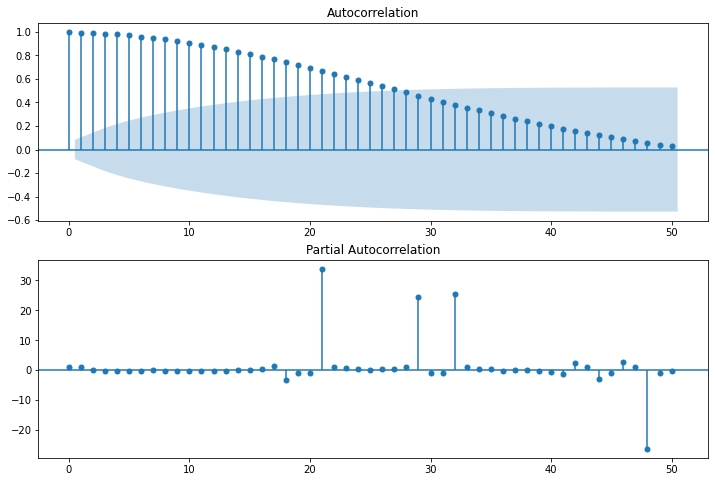

In [8]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data_frame['TT'].iloc[13:],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data_frame['TT'].iloc[13:],lags=50,ax=ax2)

In [9]:
#p=50
#d=0
#q=21 or 48

In [10]:
train_data=data_frame['TT'].loc[0:450]
test_data=data_frame['TT'].loc[451:570]

In [11]:
from statsmodels.tsa.arima.model import ARIMA
def ARIMA_model(p,d,q,cols):
    #splitting the total cases data.
    train_data=data_frame[cols].loc[0:450]
    test_data=data_frame[cols].loc[451:last_index]
    #initializing the model to train
    model=ARIMA(data_frame[cols],order=(p,d,q));
    #training the data and assigned to model_fit var.
    model_fit=model.fit()
    data=data_frame.copy()
    #predicting using test data
    data['Forecasted_data']=model_fit.predict(start=451,end=567)
    #model evaluation
    #100-(100*(sum([abs(((i-j)/j)) for i,j in zip(data['Forecasted_data'].dropna(),test_data)]))/len(test_data))
    mape = np.mean(np.abs(data['Forecasted_data'].dropna() - test_data)/np.abs(test_data))*100
    accuracy=100-mape
    print('p: {}, d: {}, q:{}'.format(p,d,q))
    print('Accuracy: {}%'.format(round(accuracy,2)))
    return model_fit

In [12]:
#for TT feature.
tt_model=ARIMA_model(50,0,21,'TT')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 50, d: 0, q:21
Accuracy: 92.68%


In [13]:
data=data_frame.copy()
data['Overall_forecasted_cases']=tt_model.predict(start=451,end=last_index)

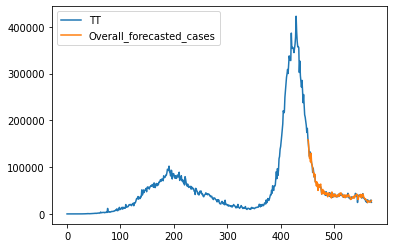

In [14]:
data[['TT','Overall_forecasted_cases']].plot();

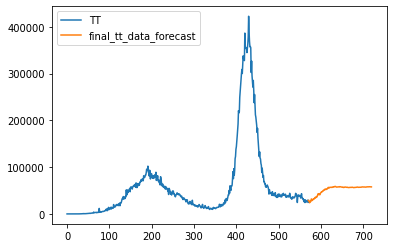

In [15]:
future_dates=range(last_index,last_index+150)
future_data=pd.DataFrame(index=future_dates,columns=data.columns)
final_data=pd.concat([data,future_data])
final_data['final_tt_data_forecast']=tt_model.predict(start=last_index,end=last_index+150,dynamic=True)
final_data[['TT','final_tt_data_forecast']].plot();

In [16]:
final_data[final_data['Date_YMD'].isnull()==True]

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,SK,TN,TG,TR,UP,UT,WB,UN,Overall_forecasted_cases,final_tt_data_forecast
570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28716.461590
571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29238.209643
572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27263.232094
573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23906.970516
574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25230.560040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57965.638729
716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57673.390247
717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57580.021713
718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57680.894392


In [17]:
final_data['Date_YMD'].iloc[571:]=pd.date_range(start='2021-10-06',periods=150,freq='D')

In [18]:
final_data['Date_YMD']=pd.to_datetime(final_data['Date_YMD'])

In [19]:
final_total_forecast_data=pd.concat([final_data['TT'].dropna(),final_data['final_tt_data_forecast'].dropna()])

## Final forecast of daily cases of overall India.

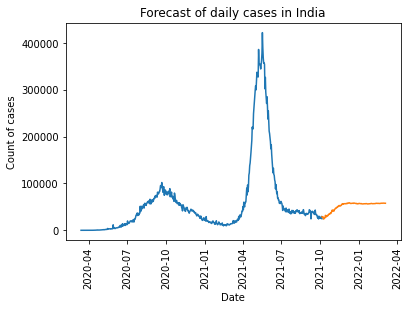

In [20]:
plt.title('Forecast of daily cases in India')
plt.plot(final_data['Date_YMD'],final_data[['TT','final_tt_data_forecast']]);
plt.xticks(rotation=90);
plt.xlabel('Date');
plt.ylabel('Count of cases');

## For 'AP' feature

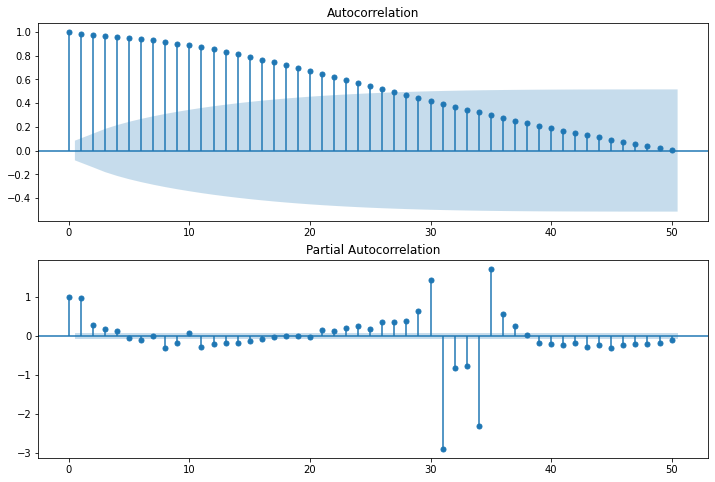

In [21]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data_frame['AP'].iloc[13:],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data_frame['AP'].iloc[13:],lags=50,ax=ax2)

In [22]:
#p=50
#d=0
#q=2

In [23]:
ARIMA_model(50,0,8,'AP')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 50, d: 0, q:8
Accuracy: 87.75%


In [24]:
ARIMA_model(50,0,29,'AP')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 50, d: 0, q:29
Accuracy: 88.99%


In [33]:
ARIMA_model(49,0,3,'AP')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 49, d: 0, q:3
Accuracy: 87.41%


In [34]:
ARIMA_model(49,0,29,'AP')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 49, d: 0, q:29
Accuracy: 88.88%


In [35]:
ARIMA_model(49,0,31,'AP')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 49, d: 0, q:31
Accuracy: 87.85%


In [25]:
ARIMA_model(50,0,31,'AP')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 50, d: 0, q:31
Accuracy: 88.03%


In [36]:
ap_model=ARIMA_model(50,0,29,'AP')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 50, d: 0, q:29
Accuracy: 88.99%


In [37]:
data=data_frame.copy()
data['ap_forecasted_cases']=ap_model.predict(start=451,end=last_index)

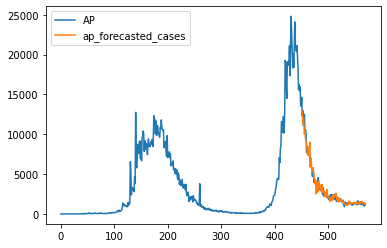

In [38]:
data[['AP','ap_forecasted_cases']].plot();

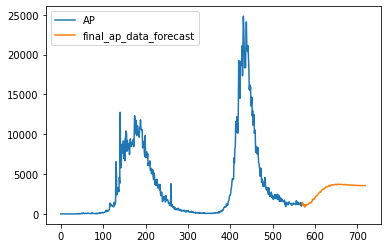

In [47]:
future_dates=range(last_index,last_index+150)
future_data=pd.DataFrame(index=future_dates,columns=data.columns)
final_data=pd.concat([data,future_data])
final_data['final_ap_data_forecast']=ap_model.predict(start=last_index,end=last_index+150,dynamic=True)
final_data[['AP','final_ap_data_forecast']].plot();

In [52]:
final_data['Date_YMD']=pd.to_datetime(final_data['Date_YMD'])
final_data['Date_YMD'].iloc[571:]=pd.date_range(start='2021-10-06',periods=150,freq='D')

In [53]:
final_total_forecast_data=pd.concat([final_data['AP'].dropna(),final_data['final_ap_data_forecast'].dropna()])

In [54]:
final_total_forecast_data

0                0
1                0
2                0
3                0
4                0
          ...     
715    3551.203461
716    3561.087347
717    3561.150871
718    3555.829175
719    3552.485457
Length: 722, dtype: object

## Final forecast of daily cases in AP.

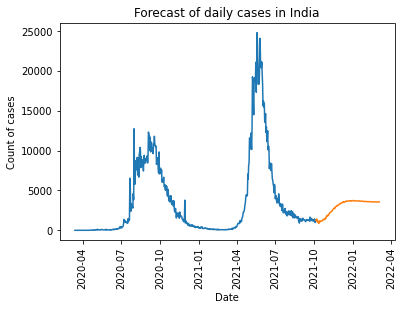

In [55]:
plt.title('Forecast of daily cases in India')
plt.plot(final_data['Date_YMD'],final_data[['AP','final_ap_data_forecast']]);
plt.xticks(rotation=90);
plt.xlabel('Date');
plt.ylabel('Count of cases');